##### Dataset source:-https://www.kaggle.com/mohansacharya/graduate-admissions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [2]:
df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


what? there is no null values, great.

In [5]:
df_copy = df.copy()

In [6]:
df = df.rename(columns={df.columns[8]: 'probability'})
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
probability,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
info = ['SR NO.', 'Graduate Record Examination', 'Test of English as a Foreign Language', 'Rating of your University',
        'Statement of Purpose simple it is a reflection of your personality', 
        'Letter of  Recommendation', ' Cumulative Grade Point Average', 'Research', 'Probability of admission']


for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

Serial No.:			SR NO.
GRE Score:			Graduate Record Examination
TOEFL Score:			Test of English as a Foreign Language
University Rating:			Rating of your University
SOP:			Statement of Purpose simple it is a reflection of your personality
LOR :			Letter of  Recommendation
CGPA:			 Cumulative Grade Point Average
Research:			Research
probability:			Probability of admission


## Data visualization

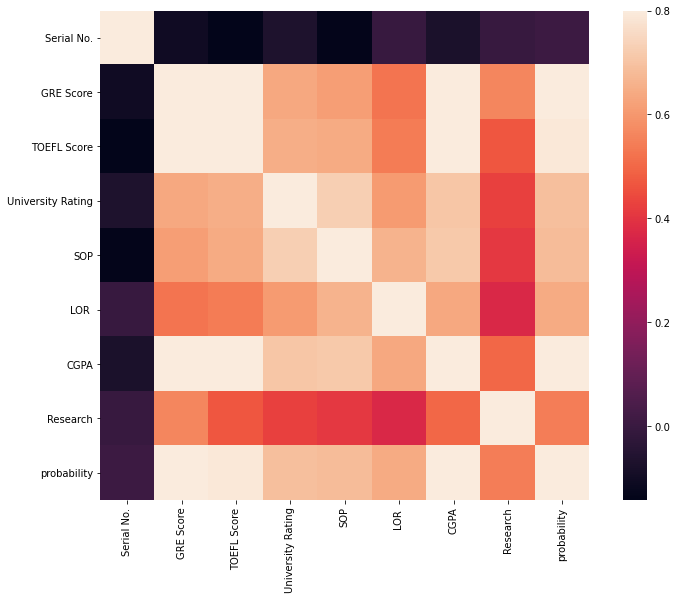

In [9]:
cormat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cormat, vmax=.8, square=True);

If you want a high chance of admission then you have to maintain a good score in GRE score, TOEFL score and CGPA it is clearly seen from the corelation matrix 
And yes LOR also somewhat matters

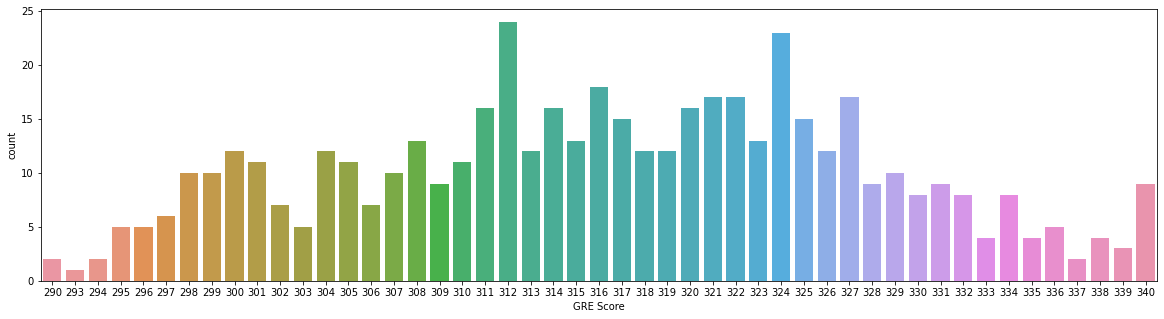

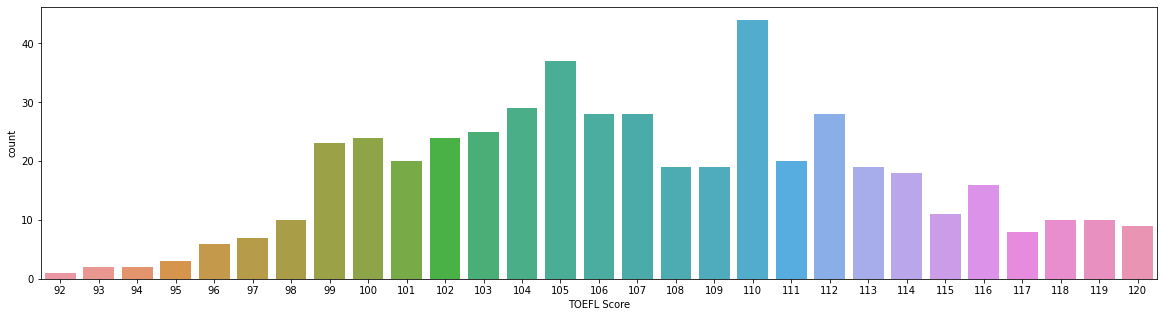

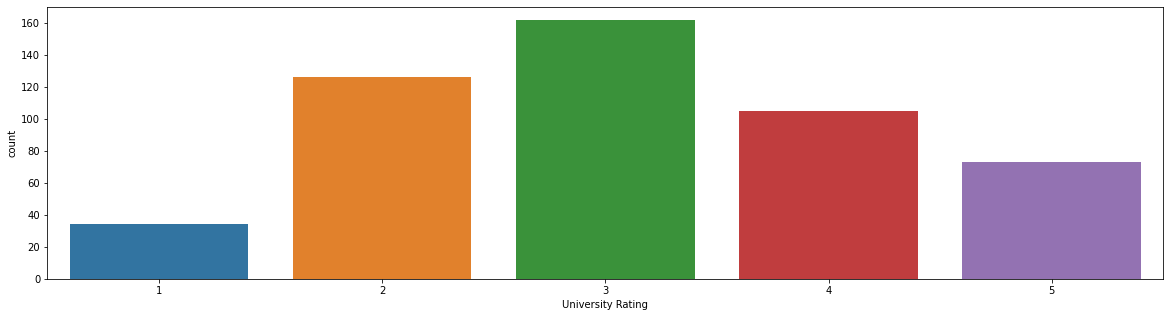

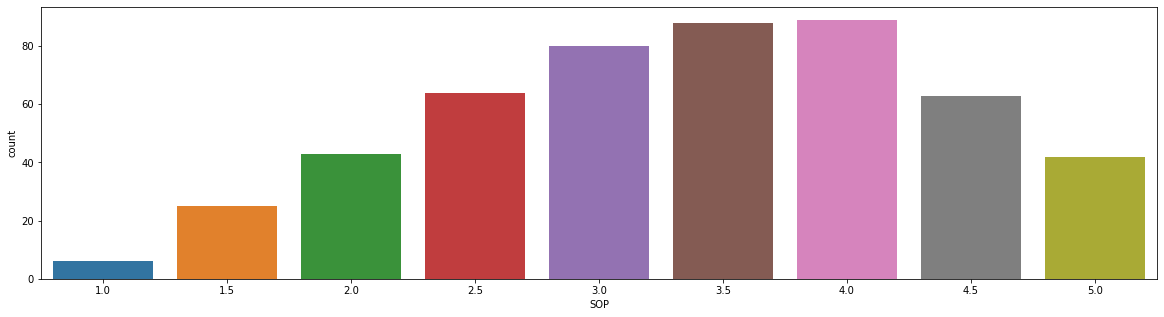

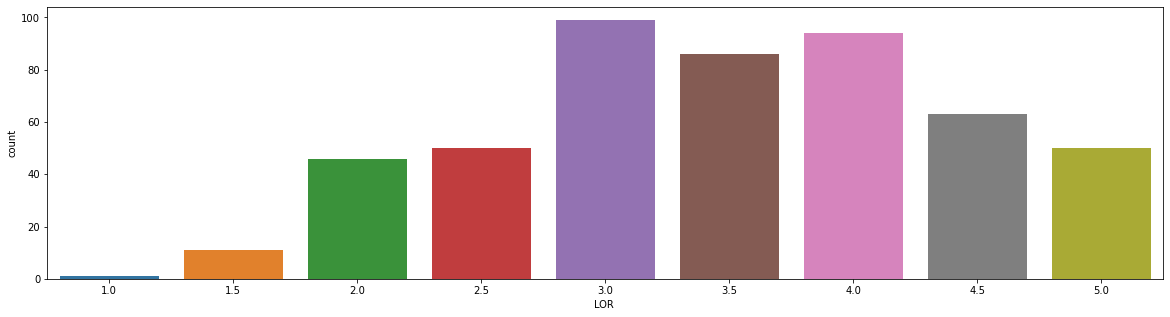

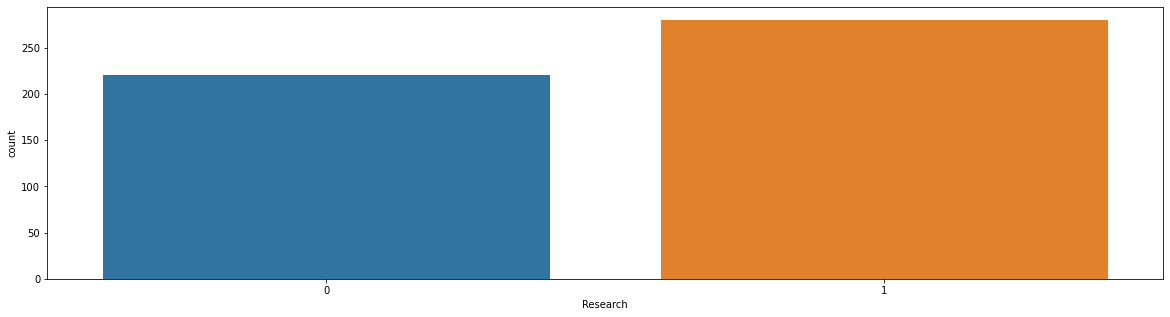

In [10]:
for i in df_copy.columns[1:-1].drop('CGPA'):
    plt.figure(figsize=(20,5)) 
    sns.countplot(x=i, data=df_copy);
    plt.show();

In [ ]:
for i in df_copy.columns[1:-1].drop('CGPA'):
    plt.figure(figsize=(20,5)) 
    plt.scatterplot(x=i, data=df_copy);
    plt.show();

Types of student who have GRE score from 311 to 327 are high in our data.

In TOEFL score first it incresase exponentially means as score increase number of student also increase and then after decrease and increase it goes on.

Ha ha generally university do not give 5 star easily, i am not saying that data is saying so 3 star student are high, yeah some student are there who got 5 star thats good that also increase the chance of admission as we have seen in corelation matrix.

Observation of both SOP and LOR are simiar like TOEFL first increase then decrease.

Well number of student whose research experience are high means 1 have good chance of admission it is clearly seen both countplot and corelation matrix as also that types of student are high.

## Feature Engineering

There is no feature engineering type like in this type of data just we have to remove 1st column bcoz it doesnt matter in our target variable.

In [11]:
df.drop('Serial No.', axis=1, inplace=True)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Model Building

In [13]:
X = df.drop('probability', axis=1)
y = df['probability']

In [14]:
# Gridsearchcv for better algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [15]:
def diff_model(X,y):
    models = {
        'LinearRegression':{
            'model':LinearRegression(),
            'parameters':{
                'normalize':[True,False],
                'n_jobs': [-1, 1]
            }
        },
        'lasso':{
            'model':Lasso(),
            'parameters':{
                'alpha':[0.00001,0.0001,0.001],
                'selection': ['random', 'cyclic']
            }
        },
        'svr':{
            'model':SVR(),
            'parameters':{
                'gamma':['auto', 'scale']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [11,20,25,100],
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [21]
            }
        }
        
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=10, return_train_score=False, scoring='explained_variance')
        gs.fit(X,y)
        scores.append({
            'model':model_name,
            'best_parameters':gs.best_params_,
            'score':gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])


diff_model(X,y)

,model,best_parameters,score
0,LinearRegression,"{'n_jobs': -1, 'normalize': False}",0.847747
1,lasso,"{'alpha': 0.001, 'selection': 'cyclic'}",0.848102
2,svr,{'gamma': 'scale'},0.730487
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.616280
4,random_forest,{'n_estimators': 20},0.811681
5,knn,{'n_neighbors': 21},0.780059


Linear regression score is high so we will use this algo here.

In [16]:
scores = cross_val_score(LinearRegression(normalize=True, n_jobs=-1), X, y, cv=10)
print('Accuracy is : {}%'.format((sum(scores)*100/len(scores))))

Accuracy is : 81.31223770253244%


In [17]:
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
model = LinearRegression(normalize=True, n_jobs=-1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_preds))))

Root Mean Square Error test = 0.05402776501782379


In [18]:
#predicting 1 example
print('prob of getting admission is {}%'.format(round(model.predict([[389, 90, 4, 4.5, 3.5, 9.65, 0]])[0]*100, 3)))

prob of getting admission is 92.934%
